In [1]:
import torch
from torch import nn, optim
from torch.autograd import grad
import numpy as np
import utils

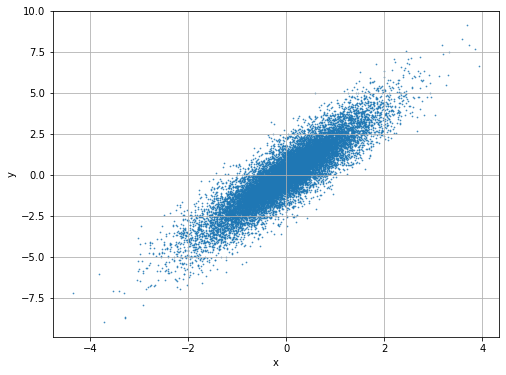

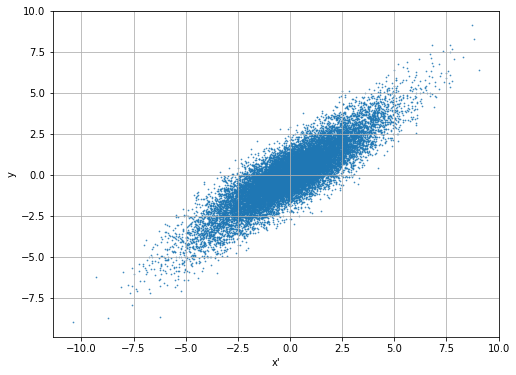

In [2]:
k = 2.0
sample = [utils.generate(s=1.0, k=k), utils.generate(s=0.5, k=k)]

x1, y1 = sample[0]
x2, y2 = sample[1]
x1, y1 = x1.numpy(), y1.numpy()
x2, y2 = x2.numpy(), y2.numpy()
x_data = np.concatenate([x1, x2], axis=0)
y_data = np.concatenate([y1, y2], axis=0)

utils.draw_dataset(x_data[:, [0]], y_data, x_label="x", filename='./figure/generalized_distribution_x_value.png')
utils.draw_dataset(x_data[:, [1]], y_data, x_label="x'", filename='./figure/generalized_distribution_x_prime.png')

----- Epoch 5000 -----
Error: 0.8509488701820374
Penalty: 0.007319848518818617
Parameter containing:
tensor([[1.5826],
        [0.2368]], requires_grad=True)
----- Epoch 10000 -----
Error: 0.9402514696121216
Penalty: 0.0005529667250812054
Parameter containing:
tensor([[1.7274],
        [0.1626]], requires_grad=True)
----- Epoch 15000 -----
Error: 0.9959583282470703
Penalty: 0.0005683571216650307
Parameter containing:
tensor([[1.7932],
        [0.1267]], requires_grad=True)
----- Epoch 20000 -----
Error: 1.0348505973815918
Penalty: -0.0003279283409938216
Parameter containing:
tensor([[1.8328],
        [0.1043]], requires_grad=True)
----- Epoch 25000 -----
Error: 1.0643324851989746
Penalty: -0.0013250481570139527
Parameter containing:
tensor([[1.8601],
        [0.0884]], requires_grad=True)
----- Epoch 30000 -----
Error: 1.088323950767517
Penalty: -0.00041986300493590534
Parameter containing:
tensor([[1.8809],
        [0.0761]], requires_grad=True)
----- Epoch 35000 -----
Error: 1.108422

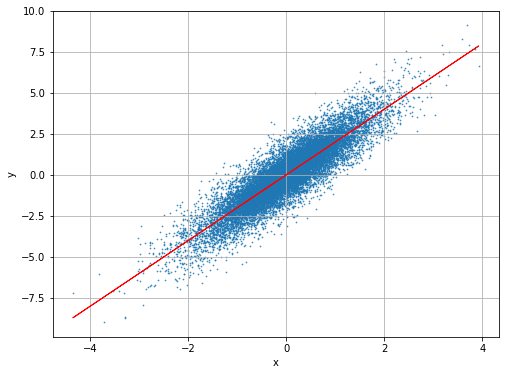

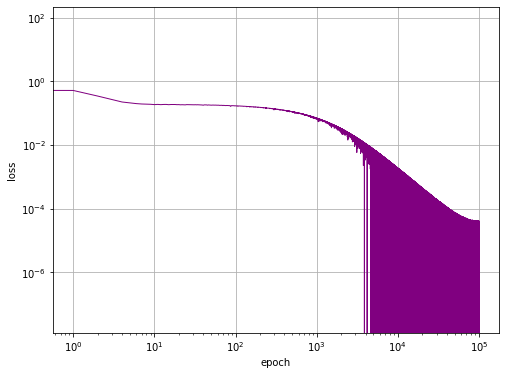

In [3]:
def evaluate(loss, omega):
    g1 = grad(loss[0::2].mean(), omega, create_graph=True)[0]
    g2 = grad(loss[1::2].mean(), omega, create_graph=True)[0]
    return (g1 * g2).sum()

theta = nn.Parameter(torch.ones(2, 1))
omega = nn.Parameter(torch.Tensor([1.0]))
optimizer = optim.SGD([theta], lr=1e-3)
function = nn.MSELoss(reduction='none')
record = []

for epoch in range(1, 100001):
    error = 0
    penalty = 0
    for x, y in sample:
        p = torch.randperm(len(x))
        x, y = x[p], y[p]
        loss = function(x @ theta * omega, y)
        error += loss.mean()
        penalty += evaluate(loss, omega)
    optimizer.zero_grad()
    (1e-5 * error + penalty).backward()
    optimizer.step()
    record.append((1e-5 * error + penalty).item())
    if epoch % 5000 == 0:
        print('----- Epoch {} -----'.format(epoch))
        print('Error: {}'.format(error.item()))
        print('Penalty: {}'.format(penalty.item()))
        print(theta)

k = theta.detach().numpy()[0, 0]
utils.draw_regression(x_data[:, [0]], y_data, k, filename='./figure/generalized_regression.png')
utils.draw_curve(record, filename='./figure/generalized_curve.png')